In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yaml
import warnings
import datetime
import sklearn
import seaborn as sns
import datetime
from datetime import date, datetime, timedelta

warnings.filterwarnings("ignore")
plt.style.use('ggplot')

### collect data from CSV

https://www.kaggle.com/manishkc06/startup-success-prediction

In [2]:
startup = pd.read_csv('data//in//startup_data.csv')

In [3]:
startup.head(5)

,unamed:0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1.0,...,c:6669,0.0,1.0,0.0,0.0,0.0,0.0,1.0000,0.0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1.0,...,c:16283,1.0,0.0,0.0,1.0,1.0,1.0,4.7500,1.0,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1.0,...,c:65620,0.0,0.0,1.0,0.0,0.0,0.0,4.0000,1.0,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1.0,...,c:42668,0.0,0.0,0.0,1.0,1.0,1.0,3.3333,1.0,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0.0,...,c:65806,1.0,1.0,0.0,0.0,0.0,0.0,1.0000,1.0,closed


In [4]:
startup = startup.drop(columns={'Unnamed: 6'})

In [5]:
startup.head(5)

,unamed:0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1.0,1/1/2007,...,c:6669,0.0,1.0,0.0,0.0,0.0,0.0,1.0000,0.0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1.0,1/1/2000,...,c:16283,1.0,0.0,0.0,1.0,1.0,1.0,4.7500,1.0,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1.0,3/18/2009,...,c:65620,0.0,0.0,1.0,0.0,0.0,0.0,4.0000,1.0,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Solidcore Systems,1.0,1/1/2002,...,c:42668,0.0,0.0,0.0,1.0,1.0,1.0,3.3333,1.0,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0.0,8/1/2010,...,c:65806,1.0,1.0,0.0,0.0,0.0,0.0,1.0000,1.0,closed


In [6]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unamed:0                  923 non-null    object 
 1   state_code                915 non-null    object 
 2   latitude                  915 non-null    float64
 3   longitude                 915 non-null    float64
 4   zip_code                  915 non-null    object 
 5   id                        915 non-null    object 
 6   city                      915 non-null    object 
 7   name                      915 non-null    object 
 8   labels                    915 non-null    float64
 9   founded_at                915 non-null    object 
 10  closed_at                 333 non-null    object 
 11  first_funding_at          915 non-null    object 
 12  last_funding_at           915 non-null    object 
 13  age_first_funding_year    915 non-null    float64
 14  age_last_f

# Data cleaning

We take just the columns that could be used in a ML algorithm

In [7]:
startup_clean = startup[['name','age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year', 'relationships','funding_rounds', 'funding_total_usd','is_CA','is_TX','is_NY'
         ,'is_MA', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_angel',
        'has_VC','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants', 'status']]

We convert the 'status', that will be our Y to predict, in a boolean variable

In [8]:
startup_clean['status'] = startup_clean['status'].replace('acquired', 1)
startup_clean['status'] = startup_clean['status'].replace('closed', 0)

startup_clean = startup_clean.rename(columns={'status': 'has_succeded'})

In [9]:
startup_clean = startup_clean[startup_clean['has_succeded'].notna()]

In [10]:
startup_clean.describe()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,is_CA,is_TX,is_NY,...,is_consulting,is_othercategory,has_angel,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,has_succeded
count,915.000000,915.000000,764.000000,764.000000,915.000000,915.000000,9.150000e+02,915.000000,915.000000,915.000000,...,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000,915.000000
mean,2.244694,3.941282,3.055172,4.752341,7.664481,2.309290,2.520676e+07,0.530055,0.043716,0.114754,...,0.003279,0.322404,0.253552,0.326776,0.508197,0.392350,0.231694,0.099454,2.842275,0.645902
std,2.516872,2.977394,2.983129,3.218284,7.207005,1.391389,1.902398e+08,0.499369,0.204574,0.318899,...,0.057197,0.467652,0.435282,0.469291,0.500206,0.488541,0.422145,0.299434,1.878195,0.478501
min,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.580800,1.669850,1.000000,2.424700,3.000000,1.000000,2.875000e+06,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000
50%,1.446600,3.545200,2.519150,4.450700,5.000000,2.000000,1.000000e+07,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,3.594500,5.568450,4.684250,6.753400,10.000000,3.000000,2.472500e+07,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.900000,1.000000
max,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [11]:
startup_clean.head(2)#[startup['age_first_milestone_year'].isna()][['milestones','age_first_milestone_year','age_last_milestone_year']]

,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,is_CA,is_TX,...,is_consulting,is_othercategory,has_angel,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,has_succeded
0,Bandsintown,2.2493,3.0027,4.6685,6.7041,3.0,3.0,375000.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0
1,TriCipher,5.1260,9.9973,7.0055,7.0055,9.0,4.0,40100000.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.75,1.0


In [12]:
startup_clean['funding_total_usd'] = startup_clean['funding_total_usd']/1000000

In [13]:
startup_clean = startup_clean.rename(columns={'funding_total_usd': 'funding_total_usd(MLN)'})

### to check how to substitute the null of age_first_milestone_year

In [14]:
age_fmy_mean = startup_clean['age_first_milestone_year'].mean()
print("mean: "+str(age_fmy_mean))

#age_fmy_mode = startup_clean['age_first_milestone_year'].mode().iat[0]
#print("mode: "+ str(age_fmy_mode))

age_fmy_median = startup_clean['age_first_milestone_year'].median()
print("median: "+ str(age_fmy_median))

mean: 3.0551718586387433
median: 2.51915


<AxesSubplot:ylabel='Frequency'>

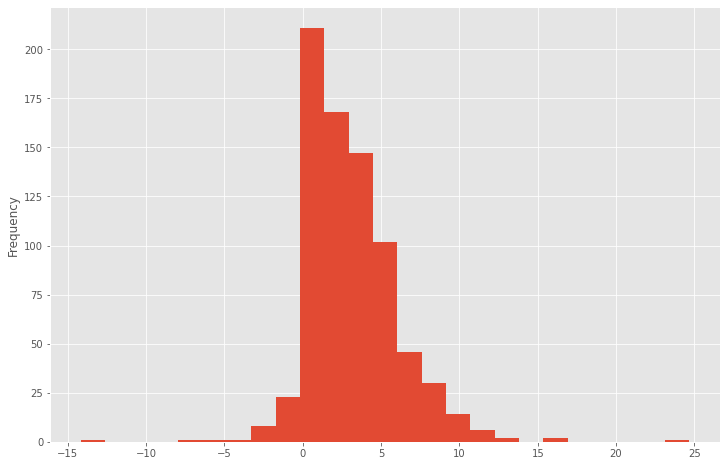

In [15]:
startup_clean['age_first_milestone_year'].dropna().plot(kind='hist', figsize=(12,8), bins=25)

### to check how to substitute the null of age_first_milestone_year

In [16]:
age_lmy_mean = startup_clean['age_last_milestone_year'].mean()
print("mean: "+str(age_lmy_mean))

#age_fmy_mode = startup_clean['age_first_milestone_year'].mode().iat[0]
#print("mode: "+ str(age_fmy_mode))

age_lmy_median = startup_clean['age_last_milestone_year'].median()
print("median: "+ str(age_lmy_mean))

mean: 4.7523412303664925
median: 4.7523412303664925


<AxesSubplot:ylabel='Frequency'>

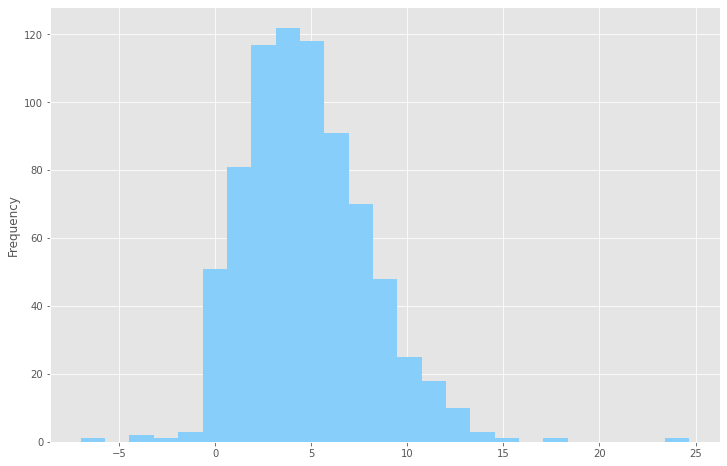

In [17]:
startup_clean['age_last_milestone_year'].dropna().plot(kind='hist', figsize=(12,8), bins=25, color='lightskyblue')

in order to avoid the null value on the fields 'age_first_milestone_year' and 'age_last_milestone_year' 
we procedeed in this way: <br>
    - calculate the mean of these value <br>
    - replace the nan with the mean

In [18]:
startup_clean['age_first_milestone_year']= startup_clean['age_first_milestone_year'].fillna(age_fmy_mean)
startup_clean['age_last_milestone_year']= startup_clean['age_last_milestone_year'].fillna(age_lmy_mean)

check on null values

In [19]:
startup.isnull().sum()

unamed:0                      0
state_code                    8
latitude                      8
longitude                     8
zip_code                      8
id                            8
city                          8
name                          8
labels                        8
founded_at                    8
closed_at                   590
first_funding_at              8
last_funding_at               8
age_first_funding_year        8
age_last_funding_year         8
age_first_milestone_year    159
age_last_milestone_year     159
relationships                 8
funding_rounds                8
funding_total_usd             8
milestones                    8
state_code.1                  9
is_CA                         8
is_NY                         8
is_MA                         8
is_TX                         8
is_otherstate                 8
category_code                 8
is_software                   8
is_web                        8
is_mobile                     8
is_enter

In [20]:
startup_clean.isnull().sum()

name                        0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd(MLN)      0
is_CA                       0
is_TX                       0
is_NY                       0
is_MA                       0
is_otherstate               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_othercategory            0
has_angel                   0
has_VC                      0
has_roundA                  0
has_roundB                  0
has_roundC                  0
has_roundD                  0
avg_participants            0
has_succeded                0
dtype: int64

# Data Exploration

In [21]:
startup_founded = startup[startup['founded_at'].isna()==False].reset_index().drop(columns={'index'})

startup_closed = startup[startup['closed_at'].isna()==False].reset_index().drop(columns={'index'})

In [22]:
startup_founded.head(3)

,unamed:0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,Bandsintown,1.0,1/1/2007,...,c:6669,0.0,1.0,0.0,0.0,0.0,0.0,1.00,0.0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,TriCipher,1.0,1/1/2000,...,c:16283,1.0,0.0,0.0,1.0,1.0,1.0,4.75,1.0,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,Plixi,1.0,3/18/2009,...,c:65620,0.0,0.0,1.0,0.0,0.0,0.0,4.00,1.0,acquired


In [23]:
startup_closed.head(5)

,unamed:0,state_code,latitude,longitude,zip_code,id,city,name,labels,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,Inhale Digital,0.0,8/1/2010,...,c:65806,1.0,1.0,0.0,0.0,0.0,0.0,1.00,1.0,closed
1,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Matisse Networks,0.0,1/1/2002,...,c:22898,0.0,0.0,0.0,1.0,0.0,0.0,3.00,1.0,closed
2,835,CA,37.452992,-122.185098,94025,c:4829,Menlo Park,Center'd,0.0,1/1/2006,...,c:4829,1.0,1.0,1.0,0.0,0.0,0.0,1.75,1.0,closed
3,531,KY,38.241467,-85.724511,40204,c:30290,Louisville,Resonant Vibes,0.0,1/1/2004,...,c:30290,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,closed
4,898,VA,38.901301,-77.265158,22182,c:54177,Vienna,Invicta Networks,0.0,1/1/1999,...,c:54177,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,closed


In [24]:
startup_founded['founded_at'] = pd.to_datetime(startup_founded['founded_at'])
len(startup_founded)

915

In [25]:
startup_closed['closed_at'] = pd.to_datetime(startup_closed['closed_at'])
len(startup_closed)

333

In [26]:
# calculation of founded startup
startup_founded['founded_at_ym'] = pd.Series()

for i in range(len(startup_founded)):
     startup_founded['founded_at_ym'][i] = startup_founded['founded_at'][i].strftime('%Y')
        
startup_founded['founded_at_ym']= startup_founded['founded_at_ym'].astype(int)


# calculation of closed startup
startup_closed['closed_at_ym'] = pd.Series()

for i in range(len(startup_closed)):
     startup_closed['closed_at_ym'][i] = startup_closed['closed_at'][i].strftime('%Y')
        
startup_closed['closed_at_ym']= startup_closed['closed_at_ym'].astype(int)

In [27]:
stgbf = startup_founded.groupby(by='founded_at_ym').agg({'unamed:0':'count'}).sort_values('founded_at_ym').reset_index()
stgbc = startup_closed.groupby(by='closed_at_ym').agg({'unamed:0':'count'}).sort_values('closed_at_ym').reset_index()


stgbf = stgbf.rename(columns={'unamed:0': '# startups founded','founded_at_ym':'year'})
stgbc = stgbc.rename(columns={'unamed:0': '# startups closed','closed_at_ym':'year'})

In [28]:
stgbfc = stgbf.merge(stgbc, how='left', on='year')
stgbfc = stgbfc.fillna(0)
stgbfc['# startups closed'] = stgbfc['# startups closed'].astype(int)
#stgbfc

In [29]:
startup_founded['status'] = startup_founded['status'].replace('acquired', 1)
startup_founded['status'] = startup_founded['status'].replace('closed', 0)

<AxesSubplot:xlabel='founded_at_ym'>

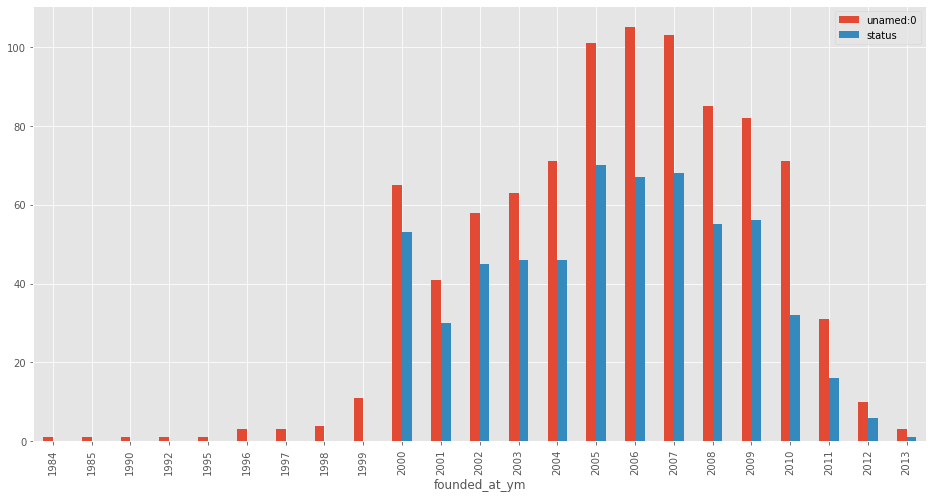

In [30]:
startup_founded.groupby(by='founded_at_ym').agg({'unamed:0':'count','status':'sum'}).plot(kind='bar', figsize=(16,8))

The chart below allow us to check the number of startups founded and closed by year. As we can easily note the two trends are really different.

<AxesSubplot:xlabel='year'>

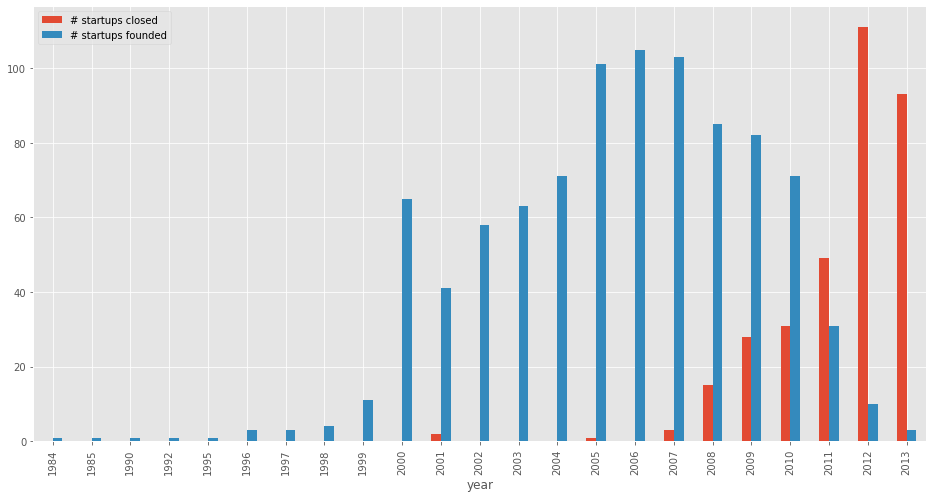

In [31]:
stgbfc.plot(figsize=(16,8), kind='bar', x='year', y=['# startups closed', '# startups founded'])

In [32]:
#stgbf.plot(figsize=(16,8), kind='bar', title='number of startups by  year of foundation', color='green')

In [33]:
#stgbc.plot(figsize=(16,8), kind='bar', title='number of startups closed by year', color='red')

We start checking with a boxplots chart the shape of our features

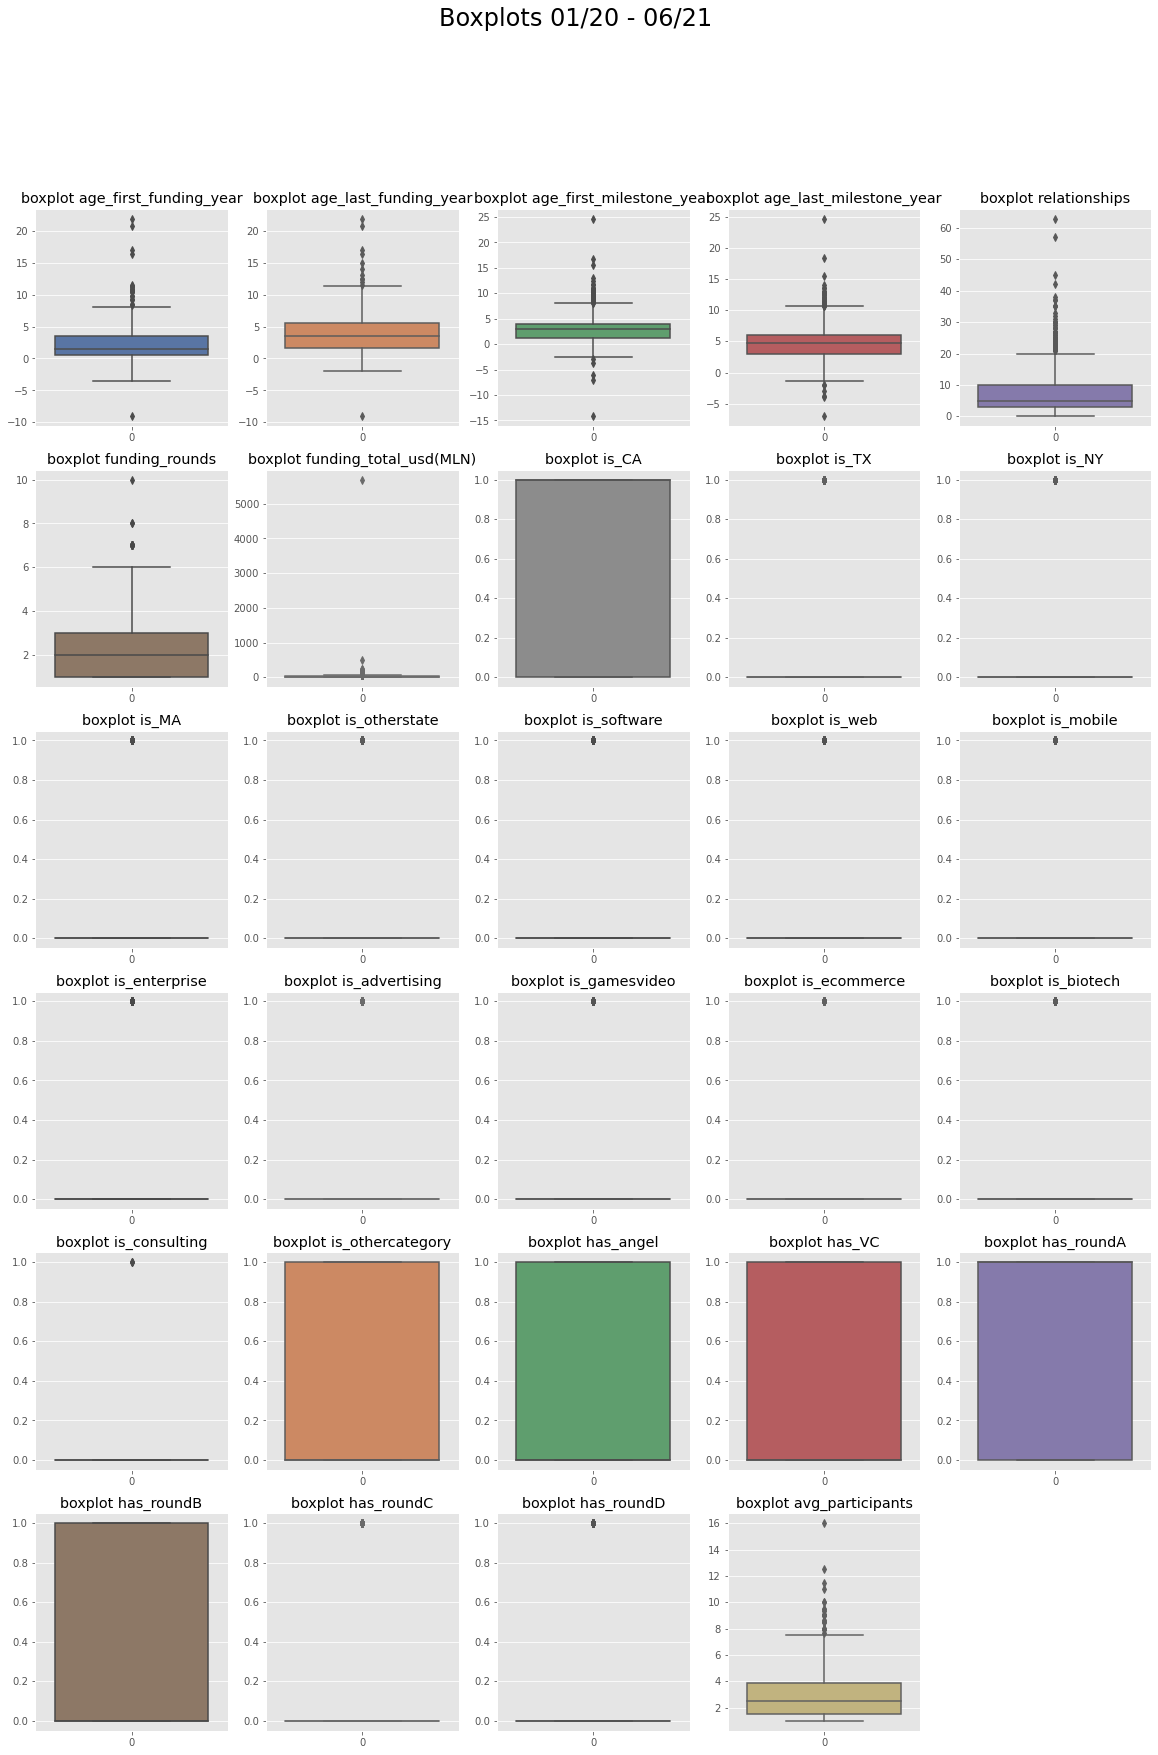

In [34]:
plt.subplots(figsize=(20,28))
c_ = sns.color_palette("deep", n_colors=30)
i = 1
for col in startup_clean.columns[1:-1]:
    plt.subplot(6,5,i)
    sns.boxplot(data=startup_clean[col],color=c_[i-1])
    #sns.swarmplot(data=startup_clean[col],color=".9")
    plt.title('boxplot '+ col)#   plt.xlim((0,1))
    i+=1
plt.suptitle("Boxplots 01/20 - 06/21",fontsize=24)
plt.show()

We repeat the same operation avoiding the binary features

In [35]:
columnsbox = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','relationships','funding_rounds','funding_total_usd(MLN)','avg_participants']

In [36]:
#sns.set_theme(style="whitegrid")

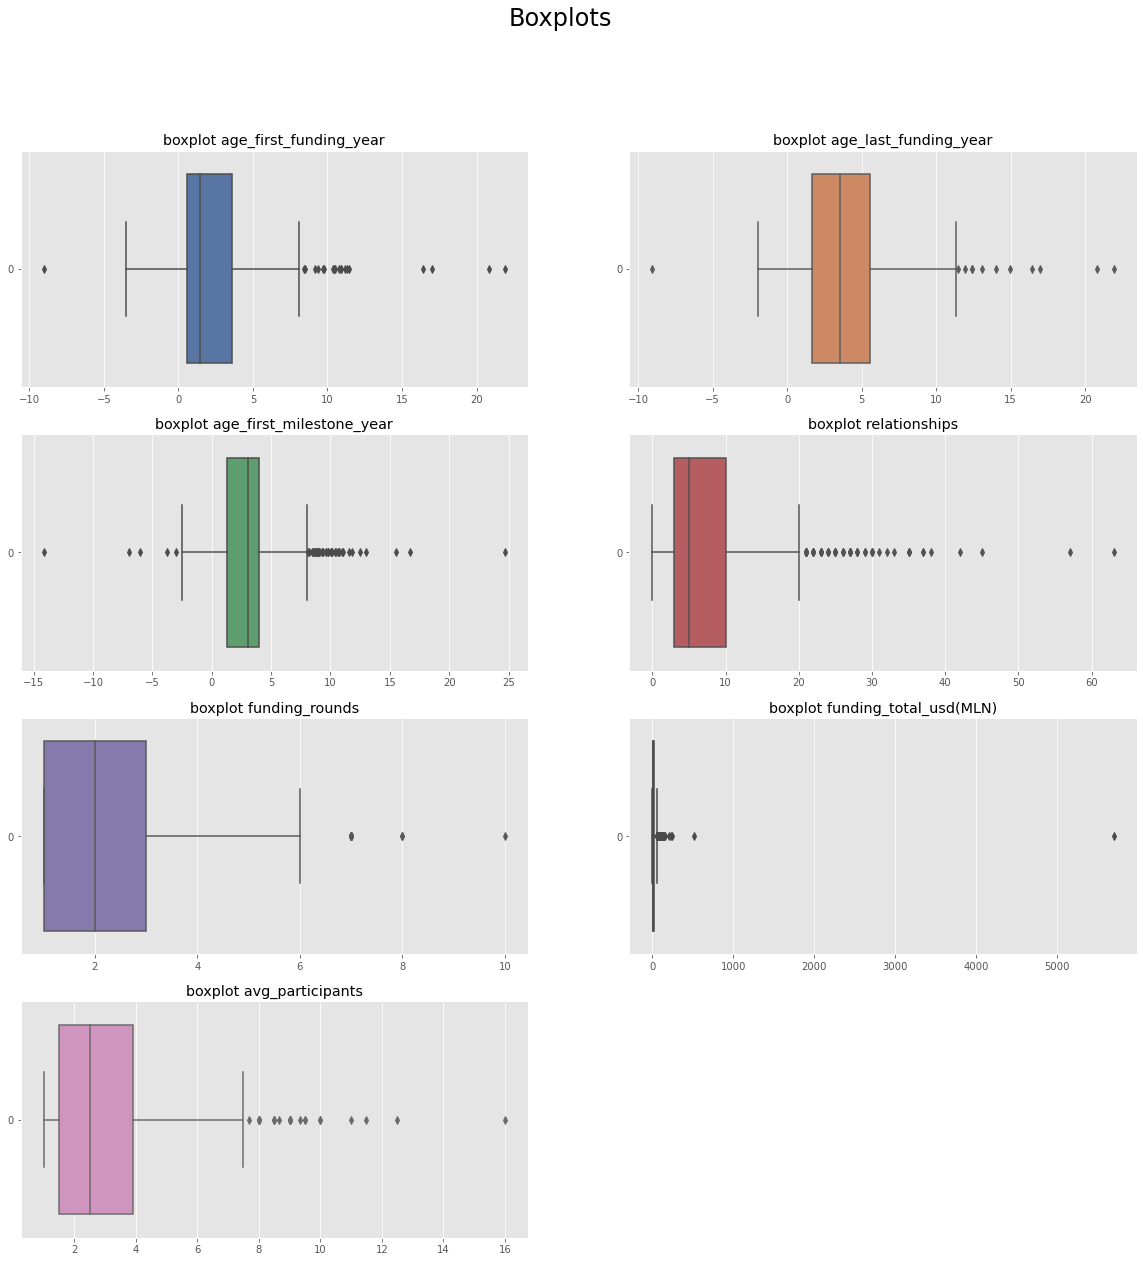

In [37]:
plt.subplots(figsize=(20,20))
c_ = sns.color_palette("deep",n_colors=30)
i = 1
for col in columnsbox:
    plt.subplot(4,2,i)
    sns.boxplot(data=startup_clean[col],color=c_[i-1], orient='h' )
    #sns.swarmplot(data=startup_clean[col],color=".9")
    plt.title('boxplot '+ col)#   plt.xlim((0,1))
    i+=1
plt.suptitle("Boxplots",fontsize=24)
plt.show()

In [38]:
startup_clean.count()#[startup_clean['age_first_funding_year']<0]

name                        915
age_first_funding_year      915
age_last_funding_year       915
age_first_milestone_year    915
age_last_milestone_year     915
relationships               915
funding_rounds              915
funding_total_usd(MLN)      915
is_CA                       915
is_TX                       915
is_NY                       915
is_MA                       915
is_otherstate               915
is_software                 915
is_web                      915
is_mobile                   915
is_enterprise               915
is_advertising              915
is_gamesvideo               915
is_ecommerce                915
is_biotech                  915
is_consulting               915
is_othercategory            915
has_angel                   915
has_VC                      915
has_roundA                  915
has_roundB                  915
has_roundC                  915
has_roundD                  915
avg_participants            915
has_succeded                915
dtype: i

In [39]:
startup_clean['funding_total_usd(MLN)'].sort_values()

754       0.011000
434       0.012000
827       0.015000
167       0.015000
585       0.019000
          ...     
694     211.403000
728     232.000100
497     238.209999
82      510.000000
364    5700.000000
Name: funding_total_usd(MLN), Length: 915, dtype: float64

In [40]:
startup_clean[startup_clean['age_first_milestone_year']<=(-14)]


,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd(MLN),is_CA,is_TX,...,is_consulting,is_othercategory,has_angel,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,has_succeded
248,Meridian,0.5397,1.5014,-14.1699,2.2082,6.0,2.0,1.975,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0


### remove relevant outliers

In [41]:
startup_clean = startup_clean[startup_clean['funding_total_usd(MLN)']<5000]
startup_clean = startup_clean[startup_clean['avg_participants']<16]
startup_clean = startup_clean[startup_clean['age_first_milestone_year']<22]
startup_clean = startup_clean[startup_clean['age_first_milestone_year']>-14]

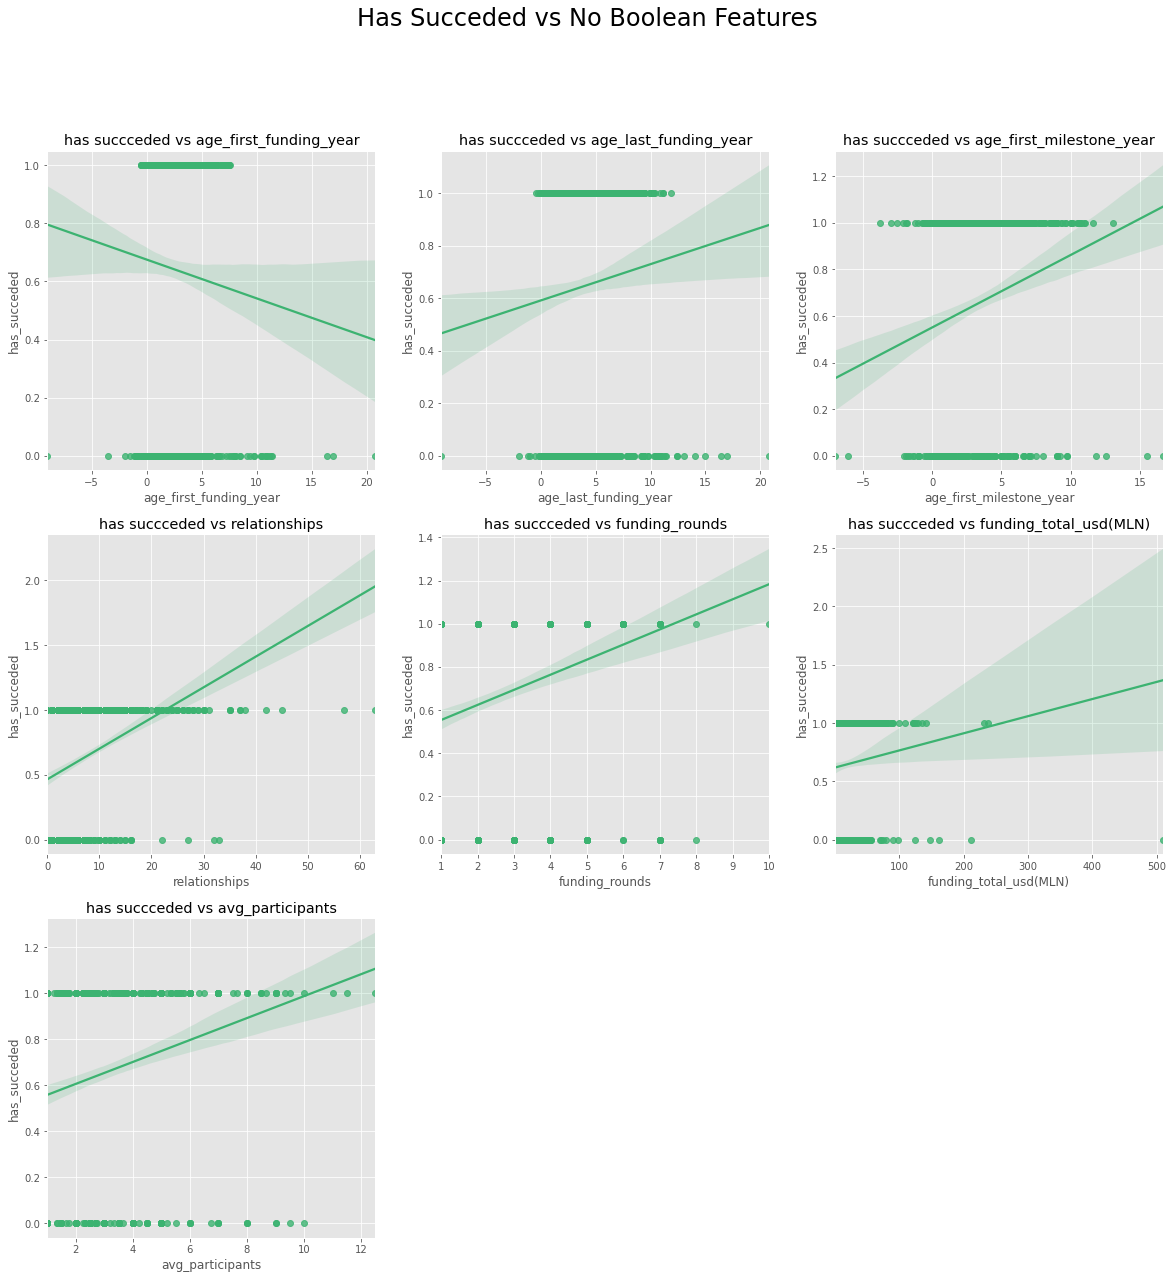

In [42]:
def plot_regs(df, features):
    plt.subplots(figsize=(20,20))
    i = 1
    for col in features:
        plt.subplot(3,3,i)
        sns.regplot(y = df['has_succeded'] , x = col, data = df, color='mediumseagreen') #, scatter_kws={'facecolors':df['color']})
        plt.title('has succceded vs '+ col)
        i+=1

regressors = startup_clean.columns[1:-1]
plot_regs(startup_clean, columnsbox)
#plt.savefig('correlations_week_{}'.format(end_date))
plt.suptitle("Has Succeded vs No Boolean Features",fontsize=24)
plt.show()

In [43]:
df_corr = startup_clean.iloc[:,:]
mat = df_corr.corr()
mat

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd(MLN),is_CA,is_TX,is_NY,...,is_consulting,is_othercategory,has_angel,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,has_succeded
age_first_funding_year,1.000000,0.750737,0.464721,0.355531,-0.191995,-0.155724,0.102437,-0.002477,0.033725,-0.129478,...,-0.012798,0.127728,-0.351299,0.163647,-0.297656,-0.055184,0.038871,0.127162,0.127208,-0.067837
age_last_funding_year,0.750737,1.000000,0.597394,0.538085,0.077512,0.398542,0.360486,0.011586,0.015721,-0.140477,...,0.030641,0.103093,-0.357929,0.352767,-0.094922,0.271655,0.330493,0.323248,0.138088,0.084297
age_first_milestone_year,0.464721,0.597394,1.000000,0.776871,0.246418,0.193299,0.240133,0.036981,-0.001374,-0.089675,...,0.055236,0.033228,-0.262300,0.104700,0.018169,0.191727,0.202129,0.245890,0.066093,0.167190
age_last_milestone_year,0.355531,0.538085,0.776871,1.000000,0.338629,0.249115,0.240775,0.065292,0.006154,-0.080016,...,0.040567,0.003073,-0.233818,0.074519,0.117281,0.254008,0.263328,0.240604,0.090142,0.246254
relationships,-0.191995,0.077512,0.246418,0.338629,1.000000,0.352159,0.232857,0.112881,-0.039606,0.053057,...,0.079870,-0.072024,-0.056960,-0.030867,0.316202,0.291037,0.256323,0.210003,0.113703,0.356429
funding_rounds,-0.155724,0.398542,0.193299,0.249115,0.352159,1.000000,0.460825,0.006857,-0.028598,0.014125,...,0.028483,-0.008996,0.011318,0.336217,0.261788,0.446442,0.440951,0.328223,0.051556,0.203439
funding_total_usd(MLN),0.102437,0.360486,0.240133,0.240775,0.232857,0.460825,1.000000,0.050651,-0.032068,-0.074567,...,0.000572,0.072110,-0.248432,0.191858,0.048817,0.298098,0.378243,0.353170,0.149073,0.093237
is_CA,-0.002477,0.011586,0.036981,0.065292,0.112881,0.006857,0.050651,1.000000,-0.228658,-0.383042,...,-0.022931,0.030492,-0.060583,-0.070951,0.074702,0.084979,0.073592,0.084765,0.079862,0.077994
is_TX,0.033725,0.015721,-0.001374,0.006154,-0.039606,-0.028598,-0.032068,-0.228658,1.000000,-0.076931,...,0.081196,0.058341,-0.051016,-0.011893,0.038868,-0.041256,0.021447,-0.053523,-0.025134,-0.053956
is_NY,-0.129478,-0.140477,-0.089675,-0.080016,0.053057,0.014125,-0.074567,-0.383042,-0.076931,1.000000,...,-0.020635,-0.018924,0.155741,-0.043488,0.014014,-0.063459,-0.058832,-0.062031,0.048286,0.056814


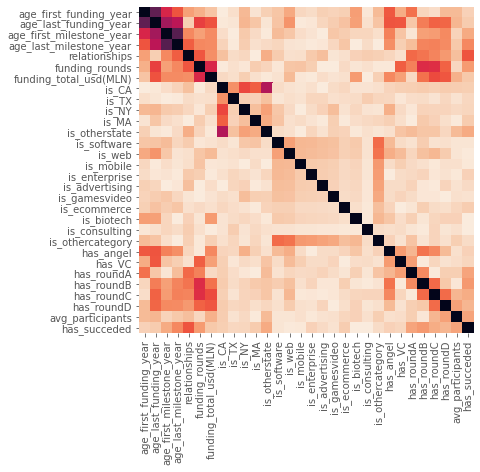

In [44]:
#plt.subplots(figsize=(7, 5))
f, ax = plt.subplots(figsize=(6,6))
#plt.figure(figsize=(20,20))
sns.heatmap(abs(mat),
            ax = ax,
            cmap = sns.cm.rocket_r,
            cbar=False
           )

#ax.set_title('Heatmap for {} - {}'.format(start_date,end_date))
plt.show()


# Classificator - Machine Learning

In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [46]:
#def get_score(model, X_train, X_test, y_train, y_test):
#    model.fit(X_train, y_train)
#    return fit.score(X_test, y_test)

We create two array X and y, in order to have all our features in X and the dependent variable in y

In [47]:
X = startup_clean[['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year', 'relationships','funding_rounds', 'funding_total_usd(MLN)','is_CA','is_TX','is_NY'
        ,'is_MA', 'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_angel',
       'has_VC','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants']].to_numpy()

#X1 =startup_clean[['age_first_funding_year', 'age_last_funding_year']]

y = startup_clean['has_succeded'].to_numpy()

In [48]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [49]:
X = scaler.transform(X)

In [50]:
print('shape of X:')
print(X.shape)
print('type of X:')
print(type(X))
print('shape of y:')
print(y.shape)
print('type of y:')
print(type(y))

shape of X:
(911, 29)
type of X:
<class 'numpy.ndarray'>
shape of y:
(911,)
type of y:
<class 'numpy.ndarray'>


Creation of n Folds

In [51]:
folds = StratifiedKFold(n_splits=10)
#foldsr = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)

In [52]:
startup_clean.head(5)

,name,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd(MLN),is_CA,is_TX,...,is_consulting,is_othercategory,has_angel,has_VC,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,has_succeded
0,Bandsintown,2.2493,3.0027,4.6685,6.7041,3.0,3.0,0.375,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0000,1.0
1,TriCipher,5.1260,9.9973,7.0055,7.0055,9.0,4.0,40.100,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.7500,1.0
2,Plixi,1.0329,1.0329,1.4575,2.2055,5.0,1.0,2.600,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0000,1.0
3,Solidcore Systems,3.1315,5.3151,6.0027,6.0027,5.0,3.0,40.000,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.3333,1.0
4,Inhale Digital,0.0000,1.6685,0.0384,0.0384,2.0,2.0,1.300,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0000,0.0


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, shuffle=True, stratify=y)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)

In [54]:
print(len(X_train))
print(len(X_test))
print(len(X_val))

573
92
246


In [55]:
X_train

array([[0.35031371, 0.38729939, 0.42506588, ..., 0.        , 0.        ,
        0.        ],
       [0.30304736, 0.30304736, 0.30061474, ..., 0.        , 0.        ,
        0.08695652],
       [0.34287705, 0.34287705, 0.38846991, ..., 0.        , 0.        ,
        0.08695652],
       ...,
       [0.34608955, 0.34608955, 0.29598411, ..., 0.        , 0.        ,
        0.        ],
       [0.27404437, 0.5081686 , 0.50734943, ..., 0.        , 0.        ,
        0.17391304],
       [0.34214343, 0.45934457, 0.42506588, ..., 1.        , 0.        ,
        0.2173913 ]])

In [56]:
X_test

array([[0.37720294, 0.42988265, 0.46869045, ..., 0.        , 0.        ,
        0.04347826],
       [0.33039552, 0.33039552, 0.42506588, ..., 0.        , 0.        ,
        0.        ],
       [0.52230161, 0.59113429, 0.50734943, ..., 1.        , 0.        ,
        0.13043478],
       ...,
       [0.42042938, 0.48540639, 0.42506588, ..., 0.        , 0.        ,
        0.17391304],
       [0.44144633, 0.50908646, 0.53131377, ..., 0.        , 0.        ,
        0.17391304],
       [0.30304736, 0.43557405, 0.4971629 , ..., 1.        , 1.        ,
        0.24347826]])

In [57]:
X_val

array([[0.30359673, 0.30359673, 0.42506588, ..., 0.        , 0.        ,
        0.        ],
       [0.33654584, 0.40978357, 0.39865644, ..., 0.        , 0.        ,
        0.04347826],
       [0.4674177 , 0.57443195, 0.42506588, ..., 0.        , 0.        ,
        0.08695652],
       ...,
       [0.35627644, 0.35627644, 0.34610558, ..., 0.        , 0.        ,
        0.08695652],
       [0.3187414 , 0.3187414 , 0.34263261, ..., 0.        , 0.        ,
        0.69565217],
       [0.34076665, 0.35012947, 0.32943786, ..., 0.        , 0.        ,
        0.08695652]])

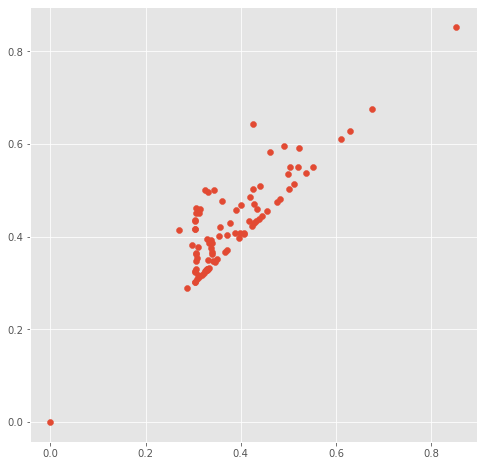

In [58]:
plt.figure(figsize=(8,8))

plt.scatter(x=X_test[:,[0]], y=X_test[:,[1]])
plt.show()

## Logistic Regression

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import confusion_matrix_custom

The first model that we would like to try is the Logistic Regression Model.<br>
With the library sklearn we create the object lr.

In [60]:
lr = LogisticRegression(solver='liblinear')

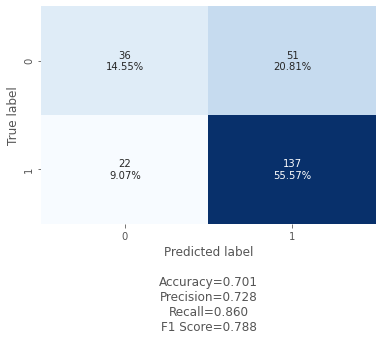

In [61]:
accuracy_val_lr = []


for i in range(0,10):
      
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, shuffle=True, stratify=y)
      X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)
        
      # for each iteration we create train and predict on the val, creating i confusion matrix   
      fit = lr.fit(X_train, y_train)
      y_pred = fit.predict(X_val)
      globals()[f"conf_mat_val_lr_{i}"]  = confusion_matrix(y_val, y_pred)
       
      # from each of these confusion matrix we extract with the function ravel tn, fn, fp, tp and we calculate the accuracy
      globals()[f"tn_val_lr_{i}"], globals()[f"fp_val_lr_{i}"], globals()[f"fn_val_lr_{i}"], globals()[f"tp_val_lr_{i}"] = globals()[f"conf_mat_val_lr_{i}"].ravel()  
      globals()[f"accuracy_val_lr_{i}"] = (globals()[f"tn_val_lr_{i}"]+globals()[f"tp_val_lr_{i}"])/(globals()[f"tn_val_lr_{i}"]+globals()[f"fn_val_lr_{i}"]+globals()[f"fp_val_lr_{i}"]+globals()[f"tp_val_lr_{i}"])
        
      # we collect the accuracy in an array with len i  
      accuracy_val_lr.append(globals()[f"accuracy_val_lr_{i}"])
      

labels=['True label','Predicted label']
#conf_mat_lr_perc = (conf_mat_lr/conf_mat_lr.sum())
conf_mat_val_lr = (conf_mat_val_lr_0+conf_mat_val_lr_1+conf_mat_val_lr_2+conf_mat_val_lr_3+conf_mat_val_lr_4+conf_mat_val_lr_5+conf_mat_val_lr_6+conf_mat_val_lr_7+conf_mat_val_lr_8+conf_mat_val_lr_9)/10
#sns.heatmap(conf_mat_lr_perc, square=True, annot=True, cmap='Blues',cbar=True,fmt='.2%')
confusion_matrix_custom.make_confusion_matrix(conf_mat_val_lr,cbar=False)

In [62]:
accuracy_val_lr

[0.7317073170731707,
 0.7235772357723578,
 0.7032520325203252,
 0.7073170731707317,
 0.6869918699186992,
 0.6991869918699187,
 0.6991869918699187,
 0.6869918699186992,
 0.7073170731707317,
 0.6666666666666666]

In this part the idea is to use the method folds.split in order to apply the prediction to differents subset of our arrays.<br>
For each iteration we collect the y predicted and the y test in order to obtain teh confusion matrix: in this way we have 10 confusion matrix.
In order to plot it, we sum all the results in a single confusion matrix.

In [63]:
#folds.split(X,y)
#
#i=0
#for train_index, test_index in folds.split(X,y):
#      X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
#      fit = lr.fit(X_train, y_train)
#      y_pred = fit.predict(X_test)
#      globals()[f"conf_mat{i}"]  = confusion_matrix(y_test, y_pred)
#      i=i+1

#labels=['True label','Predicted label']
#conf_mat_lr_perc = (conf_mat_lr/conf_mat_lr.sum())
#conf_mat_lr = conf_mat0+conf_mat1+conf_mat2+conf_mat3+conf_mat4+conf_mat5+conf_mat6+conf_mat7+conf_mat8+conf_mat9     
#sns.heatmap(conf_mat_lr_perc, square=True, annot=True, cmap='Blues',cbar=True,fmt='.2%')
#confusion_matrix_custom.make_confusion_matrix(conf_mat_lr,cbar=False)

## Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier
from numpy import random

Now we would like to apply with the same data the classifier 'Random Forest'. Here in order to have the best results we need<br>
to find the optimal n_estimators, that, as we can see, is required by the object.

In [65]:
n = random.randint(0,80)
n

13

In [66]:
cross_val_score(RandomForestClassifier(n_estimators=n), X, y, cv=10)#

array([0.72826087, 0.74725275, 0.72527473, 0.79120879, 0.75824176,
       0.72527473, 0.74725275, 0.84615385, 0.79120879, 0.72527473])

We create a dataframe to collect all the accuracies calculated by our classifier. After that we launch in loop the model <br>
changing each iteration the n of estimators (from 2 to 80) and collecting the results in the dataframe. Sorting the dataframe by the <br>
accuracy it is possible to get the best n of estimators.

Wall time: 49.9 s


<AxesSubplot:xlabel='n_estimators'>

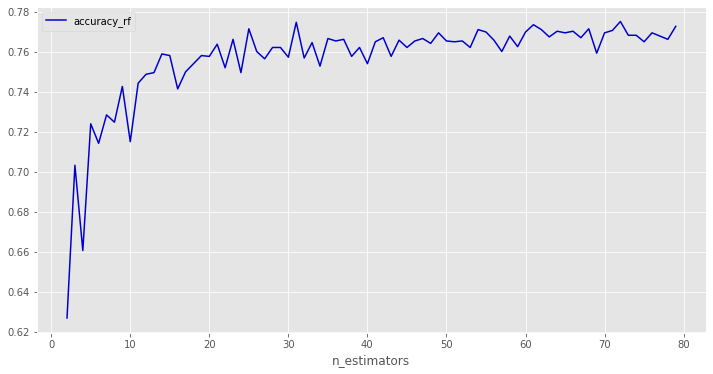

In [67]:
%%time

#for collect the results of n_estimators and accuracy to plot
accuracy_rf_nest=pd.DataFrame(np.array([(0, 0.0)]), columns=['n_estimators','accuracy_rf'])

#first cicle for the n estimators
for nest in range(2,80):
    rf = RandomForestClassifier(n_estimators=nest) 
    globals()[f"accuracy_val_rf{nest}"]=[]
    
    #second cicle for K Cross Fold Validation
    for i in range(0,10):

          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, shuffle=True, stratify=y)
          X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)
          
          # for each iteration we create train and predict on the val, creating i confusion matrix  
          fit = rf.fit(X_train, y_train)        
          y_pred = fit.predict(X_val)
          globals()[f"conf_val_rf_{i}"]  = confusion_matrix(y_val, y_pred)
          
          # from each of these confusion matrix we extract with the function ravel tn, fp, fn, tp and we calculate the accuracy (tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel())
          globals()[f"tn_val_rf_{i}"], globals()[f"fp_val_rf_{i}"], globals()[f"fn_val_rf_{i}"], globals()[f"tp_val_rf_{i}"] = globals()[f"conf_val_rf_{i}"].ravel()  
          globals()[f"accuracy_{i}"] = (globals()[f"tn_val_rf_{i}"]+globals()[f"tp_val_rf_{i}"]) / (globals()[f"tn_val_rf_{i}"]+globals()[f"fp_val_rf_{i}"]+globals()[f"fn_val_rf_{i}"]+globals()[f"tp_val_rf_{i}"])          
          
          # we collect the accuracy in an nest-esim array with len i
          globals()[f"accuracy_val_rf{nest}"].append(globals()[f"accuracy_{i}"])     
                
                
    #out of the second cycle we put for each iteration in our dataframe the n_est and the mean of the accuracies of the i-esim array            
    accuracy_rf_nest['n_estimators'][nest-2] = nest
    accuracy_rf_nest['accuracy_rf'][nest-2] = np.mean(globals()[f"accuracy_val_rf{nest}"])
    accuracy_rf_nest = accuracy_rf_nest.append({'n_estimators':0, 'accuracy_rf':0}, ignore_index=True)  
       

#we plot all the means and we obtain the best n of estimators for our validations sets    
accuracy_rf_nest=accuracy_rf_nest[accuracy_rf_nest['accuracy_rf']!=0]#.set_index()
accuracy_rf_nest.plot(kind='line', x='n_estimators',  y='accuracy_rf', figsize=(12,6), color='mediumblue')      

In [68]:
#%%time
#
#accuracy_rf_i=pd.DataFrame(np.array([(0, 0.0)]), columns=['n_estimators','accuracy_rf'])
#
#for i in range(2,81):
#      accuracy_rf_a = cross_val_score(RandomForestClassifier(n_estimators=i), X, y, cv=10).mean()    
# 
#      accuracy_rf_i['n_estimators'][i-2] = i
#      accuracy_rf_i['accuracy_rf'][i-2] = accuracy_rf_a
#      accuracy_rf_i = accuracy_rf_i.append({'n_estimators':0, 'accuracy_rf':0}, ignore_index=True)
#
#accuracy_rf_i=accuracy_rf_i[accuracy_rf_i['accuracy_rf']!=0]#.set_index()
#accuracy_rf_i.plot(kind='line', x='n_estimators',  y='accuracy_rf', figsize=(12,6), color='mediumblue')

In [69]:
accuracy_rf_nest = accuracy_rf_nest.sort_values('accuracy_rf', ascending=False).reset_index(drop=True)#.tail(3)
accuracy_rf_nest

,n_estimators,accuracy_rf
0,72.0,0.775203
1,31.0,0.774797
2,61.0,0.773577
3,79.0,0.772764
4,68.0,0.771545
...,...,...
73,10.0,0.715041
74,6.0,0.714228
75,3.0,0.703252
76,4.0,0.660569


In [70]:
accuracy_rf_nest['n_estimators'][0]

72.0

Once we know the best n estimators to use, we can use as before this number to get the accuracy of our model and <br>
to plot the confusion matrix

In [71]:
rf = RandomForestClassifier(n_estimators=int(accuracy_rf_nest['n_estimators'][0]))

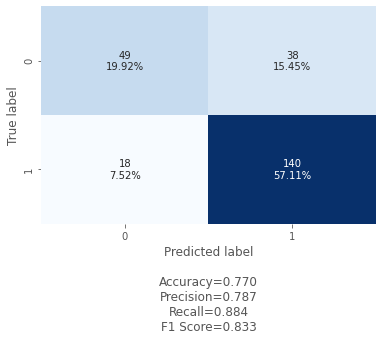

In [72]:
accuracy_val_rf = []


for i in range(0,10):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, shuffle=True, stratify=y)
      X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)
      fit = rf.fit(X_train, y_train)
      y_pred = fit.predict(X_val)
      globals()[f"conf_mat_val_rf_{i}"]  = confusion_matrix(y_val, y_pred)
        
      globals()[f"tn_val_rf_{i}"], globals()[f"fp_val_rf_{i}"], globals()[f"fn_val_rf_{i}"], globals()[f"tp_val_rf_{i}"] = globals()[f"conf_mat_val_rf_{i}"].ravel()  
      globals()[f"accuracy_val_rf_{i}"] = (globals()[f"tn_val_rf_{i}"]+globals()[f"tp_val_rf_{i}"])/(globals()[f"tn_val_rf_{i}"]+globals()[f"fn_val_rf_{i}"]+globals()[f"fp_val_rf_{i}"]+globals()[f"tp_val_rf_{i}"])
        
      accuracy_val_rf.append(globals()[f"accuracy_val_rf_{i}"])
      #i=i+1

labels=['True label','Predicted label']
#conf_mat_rf_perc = (conf_mat_rf/conf_mat_rf.sum())
conf_mat_val_rf = (conf_mat_val_rf_0+conf_mat_val_rf_1+conf_mat_val_rf_2+conf_mat_val_rf_3+conf_mat_val_rf_4+conf_mat_val_rf_5+conf_mat_val_rf_6+conf_mat_val_rf_7+conf_mat_val_rf_8+conf_mat_val_rf_9)/10
#sns.heatmap(conf_mat_rf_perc, square=True, annot=True, cmap='Blues',cbar=True,fmt='.2%')
confusion_matrix_custom.make_confusion_matrix(conf_mat_val_rf,cbar=False)

In [73]:
#i=0
#for train_index, test_index in folds.split(X,y):
#      X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
#      fit = rf.fit(X_train, y_train)
#      y_pred = fit.predict(X_test)
#      globals()[f"conf_mat{i}"]  = confusion_matrix(y_test, y_pred)
#      i=i+1

#labels=['True label','Predicted label']
#conf_mat_lr_perc = (conf_mat_lr/conf_mat_lr.sum())
#conf_mat_rf = conf_mat1+conf_mat2+conf_mat3+conf_mat4+conf_mat5+conf_mat6+conf_mat7+conf_mat8+conf_mat9     
#sns.heatmap(conf_mat_lr_perc, square=True, annot=True, cmap='Blues',cbar=True,fmt='.2%')
#confusion_matrix_custom.make_confusion_matrix(conf_mat_rf, cbar=False)

In [74]:
accuracy_val_rf

[0.7764227642276422,
 0.7886178861788617,
 0.7926829268292683,
 0.7682926829268293,
 0.7439024390243902,
 0.7845528455284553,
 0.7642276422764228,
 0.8008130081300813,
 0.7479674796747967,
 0.7357723577235772]

# Support Vector Machine

In [75]:
from sklearn import svm

Wall time: 2min 25s


<AxesSubplot:xlabel='c'>

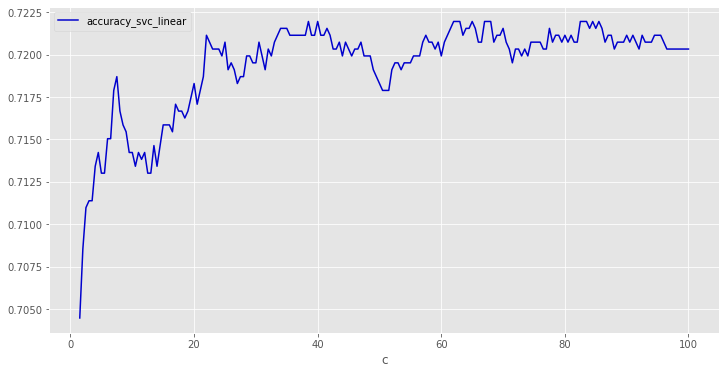

In [76]:
%%time

#for collect the results of n_estimators and accuracy to plot
accuracy_svc_c_linear=pd.DataFrame(np.array([(0, 0.0)]), columns=['c','accuracy_svc_linear'])

#first cicle for the n estimators
for j in range(0,200):
    c=(j+1)/2
    svc = svm.SVC(C=c, kernel='linear')
    globals()[f"accuracy_val_svc{j}"]=[]
    
    #second cicle for K Cross Fold Validation
    for i in range(0,10):

          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, shuffle=True, stratify=y)
          X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)
          
          # for each iteration we create train and predict on the val, creating i confusion matrix  
          fit = svc.fit(X_train, y_train)        
          y_pred = fit.predict(X_val)
          globals()[f"conf_val_svc_{i}"]  = confusion_matrix(y_val, y_pred)
          
          # from each of these confusion matrix we extract with the function ravel tn, fn, fp, tp and we calculate the accuracy
          globals()[f"tn_val_svc_{i}"], globals()[f"fp_val_svc_{i}"], globals()[f"fn_val_svc_{i}"], globals()[f"tp_val_svc_{i}"] = globals()[f"conf_val_svc_{i}"].ravel()  
          globals()[f"accuracy_svc{i}"] = (globals()[f"tn_val_svc_{i}"]+globals()[f"tp_val_svc_{i}"]) / (globals()[f"tn_val_svc_{i}"]+globals()[f"fn_val_svc_{i}"]+globals()[f"fp_val_svc_{i}"]+globals()[f"tp_val_svc_{i}"])          
          
          # we collect the accuracy in an c-esim array with len i
          globals()[f"accuracy_val_svc{j}"].append(globals()[f"accuracy_svc{i}"])     
                
                
    #out of the second cycle we put for each iteration in our dataframe the n_est and the mean of the accuracies of the i-esim array            
    accuracy_svc_c_linear['c'][j-2] = c
    accuracy_svc_c_linear['accuracy_svc_linear'][j-2] = np.mean(globals()[f"accuracy_val_svc{j}"])
    accuracy_svc_c_linear = accuracy_svc_c_linear.append({'c':0, 'accuracy_svc_linear':0}, ignore_index=True)  
       

#we plot all the means and we obtain the best n of estimators for our validations sets    
accuracy_svc_c_linear=accuracy_svc_c_linear[accuracy_svc_c_linear['accuracy_svc_linear']!=0]#.set_index()
accuracy_svc_c_linear.plot(kind='line', x='c',  y='accuracy_svc_linear', figsize=(12,6), color='mediumblue')     

Wall time: 6.1 s


<AxesSubplot:xlabel='c'>

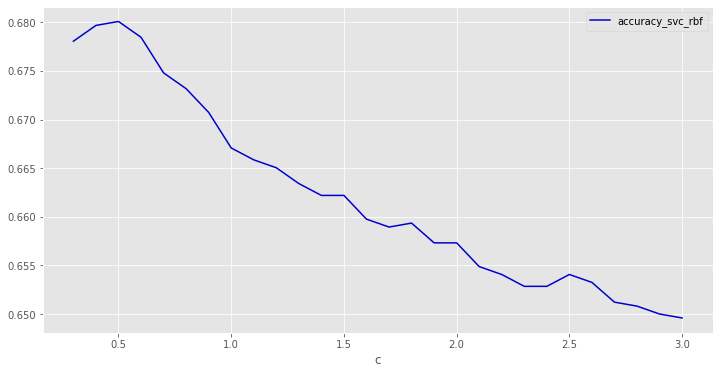

In [77]:
%%time

#for collect the results of n_estimators and accuracy to plot
accuracy_svc_c_rbf=pd.DataFrame(np.array([(0, 0.0)]), columns=['c','accuracy_svc_rbf'])

#first cicle for the n estimators
for j in range(0,30):
    c=(j+1)/10
    svc = svm.SVC(C=c)
    globals()[f"accuracy_val_svc{j}"]=[]
    
    #second cicle for K Cross Fold Validation
    for i in range(0,10):

          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, shuffle=True, stratify=y)
          X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)
          
          # for each iteration we create train and predict on the val, creating i confusion matrix  
          fit = svc.fit(X_train, y_train)        
          y_pred = fit.predict(X_val)
          globals()[f"conf_val_svc_{i}"]  = confusion_matrix(y_val, y_pred)
          
          # from each of these confusion matrix we extract with the function ravel tn, fn, fp, tp and we calculate the accuracy
          globals()[f"tn_val_svc_{i}"], globals()[f"fp_val_svc_{i}"], globals()[f"fn_val_svc_{i}"], globals()[f"tp_val_svc_{i}"] = globals()[f"conf_val_svc_{i}"].ravel()  
          globals()[f"accuracy_svc{i}"] = (globals()[f"tn_val_svc_{i}"]+globals()[f"tp_val_svc_{i}"]) / (globals()[f"tn_val_svc_{i}"]+globals()[f"fn_val_svc_{i}"]+globals()[f"fp_val_svc_{i}"]+globals()[f"tp_val_svc_{i}"])          
          
          # we collect the accuracy in an c-esim array with len i
          globals()[f"accuracy_val_svc{j}"].append(globals()[f"accuracy_svc{i}"])     
                
                
    #out of the second cycle we put for each iteration in our dataframe the n_est and the mean of the accuracies of the i-esim array            
    accuracy_svc_c_rbf['c'][j-2] = c
    accuracy_svc_c_rbf['accuracy_svc_rbf'][j-2] = np.mean(globals()[f"accuracy_val_svc{j}"])
    accuracy_svc_c_rbf = accuracy_svc_c_rbf.append({'c':0, 'accuracy_svc_rbf':0}, ignore_index=True)  
       

#we plot all the means and we obtain the best n of estimators for our validations sets    
accuracy_svc_c_rbf=accuracy_svc_c_rbf[accuracy_svc_c_rbf['accuracy_svc_rbf']!=0]#.set_index()
accuracy_svc_c_rbf.plot(kind='line', x='c',  y='accuracy_svc_rbf', figsize=(12,6), color='mediumblue')     

Wall time: 7.15 s


<AxesSubplot:xlabel='c'>

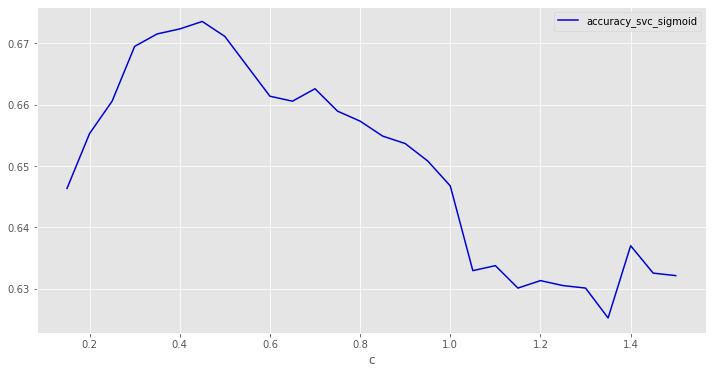

In [78]:
%%time

#for collect the results of n_estimators and accuracy to plot
accuracy_svc_c=pd.DataFrame(np.array([(0, 0.0)]), columns=['c','accuracy_svc_sigmoid'])

#first cicle for the n estimators
for j in range(0,30):
    c=(j+1)/20
    svc = svm.SVC(C=c, kernel='sigmoid')
    globals()[f"accuracy_val_svc{j}"]=[]
    
    #second cicle for K Cross Fold Validation
    for i in range(0,10):

          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, shuffle=True, stratify=y)
          X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)
          
          # for each iteration we create train and predict on the val, creating i confusion matrix  
          fit = svc.fit(X_train, y_train)        
          y_pred = fit.predict(X_val)
          globals()[f"conf_val_svc_{i}"]  = confusion_matrix(y_val, y_pred)
          
          # from each of these confusion matrix we extract with the function ravel tn, fn, fp, tp and we calculate the accuracy
          globals()[f"tn_val_svc_{i}"], globals()[f"fp_val_svc_{i}"], globals()[f"fn_val_svc_{i}"], globals()[f"tp_val_svc_{i}"] = globals()[f"conf_val_svc_{i}"].ravel()  
          globals()[f"accuracy_svc{i}"] = (globals()[f"tn_val_svc_{i}"]+globals()[f"tp_val_svc_{i}"]) / (globals()[f"tn_val_svc_{i}"]+globals()[f"fn_val_svc_{i}"]+globals()[f"fp_val_svc_{i}"]+globals()[f"tp_val_svc_{i}"])          
          
          # we collect the accuracy in an c-esim array with len i
          globals()[f"accuracy_val_svc{j}"].append(globals()[f"accuracy_svc{i}"])     
                
                
    #out of the second cycle we put for each iteration in our dataframe the n_est and the mean of the accuracies of the i-esim array            
    accuracy_svc_c['c'][j-2] = c
    accuracy_svc_c['accuracy_svc_sigmoid'][j-2] = np.mean(globals()[f"accuracy_val_svc{j}"])
    accuracy_svc_c = accuracy_svc_c.append({'c':0, 'accuracy_svc_sigmoid':0}, ignore_index=True)  
       

#we plot all the means and we obtain the best n of estimators for our validations sets    
accuracy_svc_c=accuracy_svc_c[accuracy_svc_c['accuracy_svc_sigmoid']!=0]#.set_index()
accuracy_svc_c.plot(kind='line', x='c',  y='accuracy_svc_sigmoid', figsize=(12,6), color='mediumblue')     

We create a dataframe to collect all the accuracies calculated by our classifier. After that we launch in loop the model <br>
changing each iteration the value of C and collecting the results in the dataframe. Sorting the dataframe by the <br>
accuracy it is possible to get the best n of estimators.

In [79]:
accuracy_svc_c_linear = accuracy_svc_c_linear.sort_values('accuracy_svc_linear', ascending=False).reset_index(drop=True)#.tail(3)
accuracy_svc_c_linear.head(5)

,c,accuracy_svc_linear
0,40.0,0.721951
1,65.0,0.721951
2,67.5,0.721951
3,83.5,0.721951
4,82.5,0.721951


In [80]:
accuracy_svc_c_rbf = accuracy_svc_c_rbf.sort_values('accuracy_svc_rbf', ascending=False).reset_index(drop=True)#.tail(3)
accuracy_svc_c_rbf.head(5)

,c,accuracy_svc_rbf
0,0.5,0.680081
1,0.4,0.679675
2,0.6,0.678455
3,0.3,0.678049
4,0.7,0.674797


In [81]:
accuracy_svc_c_rbf['c'][0]

0.5

In [82]:
svc = svm.SVC(C=float(accuracy_svc_c_linear['c'][0]), kernel='linear') #

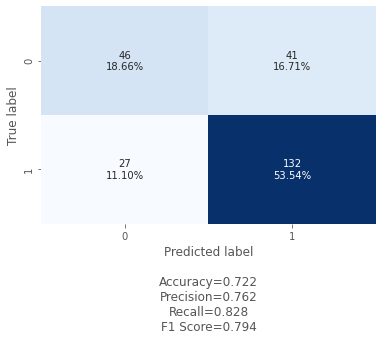

In [83]:
accuracy_val_svc = []


for i in range(0,10):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, shuffle=True, stratify=y)
      X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)
      fit = svc.fit(X_train, y_train)
      y_pred = fit.predict(X_val)
      globals()[f"conf_mat_val_svc_{i}"]  = confusion_matrix(y_val, y_pred)
        
      globals()[f"tn_val_svc_{i}"], globals()[f"fp_val_svc_{i}"], globals()[f"fn_val_svc_{i}"], globals()[f"tp_val_svc_{i}"] = globals()[f"conf_mat_val_svc_{i}"].ravel()  
      globals()[f"accuracy_val_svc_{i}"] = (globals()[f"tn_val_svc_{i}"]+globals()[f"tp_val_svc_{i}"])/(globals()[f"tn_val_svc_{i}"]+globals()[f"fn_val_svc_{i}"]+globals()[f"fp_val_svc_{i}"]+globals()[f"tp_val_svc_{i}"])
        
      accuracy_val_svc.append(globals()[f"accuracy_val_svc_{i}"])
              

labels=['True label','Predicted label']
#conf_mat_svc_perc = (conf_mat_svc/conf_mat_svc.sum())
conf_mat_val_svc = (conf_mat_val_svc_0+conf_mat_val_svc_1+conf_mat_val_svc_2+conf_mat_val_svc_3+conf_mat_val_svc_4+conf_mat_val_svc_5+conf_mat_val_svc_6+conf_mat_val_svc_7+conf_mat_val_svc_8+conf_mat_val_svc_9)/10
#sns.heatmap(conf_mat_svc_perc, square=True, annot=True, cmap='Blues',cbar=True,fmt='.2%')
confusion_matrix_custom.make_confusion_matrix(conf_mat_val_svc,cbar=False)

In [84]:
accuracy_val_svc

[0.7317073170731707,
 0.7276422764227642,
 0.7154471544715447,
 0.7235772357723578,
 0.7113821138211383,
 0.7317073170731707,
 0.7398373983739838,
 0.7113821138211383,
 0.7154471544715447,
 0.7113821138211383]

In [85]:
#i=0
#for i in range(0,9):
#      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, shuffle=True, stratify=y)
#      X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)
#      fit = svc.fit(X_train, y_train)
#      y_pred = fit.predict(X_val)
#      globals()[f"conf_mat{i}"]  = confusion_matrix(y_val, y_pred)
#      i=i+1

#labels=['True label','Predicted label']
#conf_mat_lr_perc = (conf_mat_lr/conf_mat_lr.sum())
#conf_mat_svc = conf_mat0+conf_mat1+conf_mat2+conf_mat3+conf_mat4+conf_mat5+conf_mat6+conf_mat7+conf_mat8+conf_mat9     
#sns.heatmap(conf_mat_lr_perc, square=True, annot=True, cmap='Blues',cbar=True,fmt='.2%')
#confusion_matrix_custom.make_confusion_matrix(conf_mat_svc,cbar=False)

In [86]:
#i=0
#for train_index, test_index in folds.split(X,y):
#      X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
#      fit = svc.fit(X_train, y_train)
#      y_pred = fit.predict(X_test)
#      globals()[f"conf_mat{i}"]  = confusion_matrix(y_test, y_pred)
#      i=i+1
#
#labels=['True label','Predicted label']
#conf_mat_lr_perc = (conf_mat_lr/conf_mat_lr.sum())
#conf_mat_svc = conf_mat1+conf_mat2+conf_mat3+conf_mat4+conf_mat5+conf_mat6+conf_mat7+conf_mat8+conf_mat9     
#sns.heatmap(conf_mat_svc, square=True, annot=True, cmap='Blues',cbar=True,fmt='d')
#confusion_matrix_custom.make_confusion_matrix(conf_mat_svc)

### Wilcoxon Test

In [87]:
from scipy.stats import wilcoxon

During the fit on the validation sets we collected all the accuracies for each model in these below arrays:

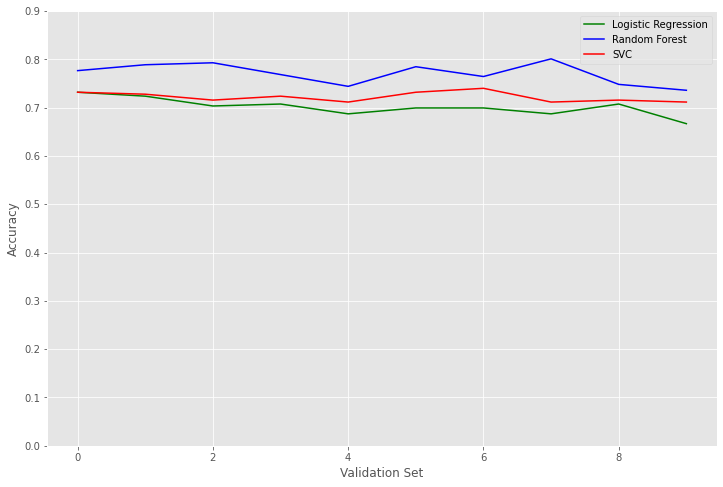

In [88]:
plt.figure(figsize=(12,8))

ax=[0,1,2,3,4,5,6,7,8,9]

plt.xlabel('Validation Set')
plt.ylabel('Accuracy')

plt.ylim( (0, 0.9) )

plt.plot(ax, accuracy_val_lr, color ="green", label='Logistic Regression')
plt.plot(ax, accuracy_val_rf, color ="blue", label='Random Forest')
plt.plot(ax, accuracy_val_svc, color ="red", label='SVC')


plt.legend()
plt.show()

In [89]:
accuracy_val_lr

[0.7317073170731707,
 0.7235772357723578,
 0.7032520325203252,
 0.7073170731707317,
 0.6869918699186992,
 0.6991869918699187,
 0.6991869918699187,
 0.6869918699186992,
 0.7073170731707317,
 0.6666666666666666]

In [90]:
accuracy_val_rf

[0.7764227642276422,
 0.7886178861788617,
 0.7926829268292683,
 0.7682926829268293,
 0.7439024390243902,
 0.7845528455284553,
 0.7642276422764228,
 0.8008130081300813,
 0.7479674796747967,
 0.7357723577235772]

In [91]:
accuracy_val_svc

[0.7317073170731707,
 0.7276422764227642,
 0.7154471544715447,
 0.7235772357723578,
 0.7113821138211383,
 0.7317073170731707,
 0.7398373983739838,
 0.7113821138211383,
 0.7154471544715447,
 0.7113821138211383]

At this point we need to perform the Wilcoxon test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html); due to the limit of the function we will perform the tests for each couple of <br>
model (Round Robin)

Logistic Regression vs Random Forest

In [92]:
w_lr_rf, p_lr_rf = wilcoxon(accuracy_val_lr, accuracy_val_rf)

In [93]:
print('P value of LR vs CRF:') 
print(p_lr_rf)

P value of LR vs CRF:
0.001953125


Random Forest  vs Suppport Vector Classifier

In [94]:
w_rf_svc, p_rf_svc = wilcoxon(accuracy_val_rf, accuracy_val_svc)

In [95]:
print('P value of RF vs SVC:') 
print(p_rf_svc)

P value of RF vs SVC:
0.001953125


Logistic Regression vs Suppport Vector Classifier

In [96]:
w_lr_svc, p_lr_svc = wilcoxon(accuracy_val_lr, accuracy_val_svc)

In [97]:
print('P value of RF vs SVC:') 
print(p_lr_svc)

P value of RF vs SVC:
0.007632441648205508


### Final Perfomance Calculation with Test sets

We choose to use the Random Forest. In order to calculate the pesvcomances we create again the confusion matrix using the test indexes.

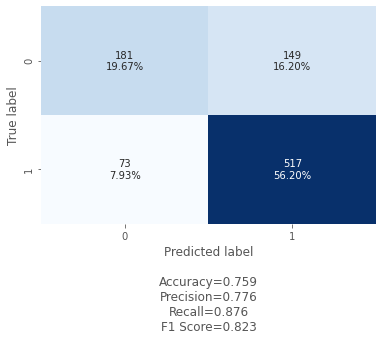

In [98]:
for i in range(0,10):
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i, shuffle=True, stratify=y)
      X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.3, random_state=0, shuffle=True, stratify=y_train)
      fit = rf.fit(X_train, y_train)
      y_pred = fit.predict(X_test)
      globals()[f"conf_mat{i}"]  = confusion_matrix(y_test, y_pred)
      

labels=['True label','Predicted label']
#conf_mat_lr_perc = (conf_mat_lr/conf_mat_lr.sum())
conf_mat_rf = conf_mat0+conf_mat1+conf_mat2+conf_mat3+conf_mat4+conf_mat5+conf_mat6+conf_mat7+conf_mat8+conf_mat9     
#sns.heatmap(conf_mat_lr_perc, square=True, annot=True, cmap='Blues',cbar=True,fmt='.2%')
confusion_matrix_custom.make_confusion_matrix(conf_mat_rf,cbar=False)